In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Company_Revenues_2000_2023.csv')
dataset.head()

,Year,Company 1,Company 2,Company 3,Company 4,Company 5,Company 6,Company 7,Company 8,Company 9,Company 10,Company 11,Company 12,Company 13,Company 14,Company 15,Rest of the market
0,2000,57.8,73.0,48.4,56.0,60.4,44.0,53.4,50.2,51.5,38.4,50.4,57.5,71.8,64.4,82.3,120
1,2001,64.1,83.2,51.0,60.4,69.1,50.1,58.5,55.8,55.5,41.0,55.2,62.4,79.5,68.1,94.4,132
2,2002,73.6,93.2,56.3,65.3,78.2,56.0,62.3,63.7,62.8,47.0,62.0,69.3,86.8,77.9,107.3,162
3,2003,77.6,98.1,61.2,73.8,89.8,59.7,69.2,69.3,72.0,53.3,70.3,76.0,94.8,83.9,113.3,202
4,2004,88.2,111.0,70.4,84.9,99.3,67.2,79.1,78.6,77.4,58.4,74.7,87.1,105.3,90.0,126.6,233


### WE WANNA KNOW HOW MUCH IS THE REVENUE IN THE MARKET ON THIS REGION

In [3]:
#We start the market size calculation

dataset['Total'] = dataset.loc[:,dataset.columns != 'Year'].sum(axis = 1)

# [:, 1]  >>>  THE : BELONGS TO ALL THW ROES OF DATASET REPRESENTING THE YEARS.
# (dataset.columns != 'Year') >>>> I WANNA ALL THE COLUMNS EXECEPT THE YEAR, THE LAST ONE.

In [4]:
dataset.head()
# was created a new columns called TOTAL

,Year,Company 1,Company 2,Company 3,Company 4,Company 5,Company 6,Company 7,Company 8,Company 9,Company 10,Company 11,Company 12,Company 13,Company 14,Company 15,Rest of the market,Total
0,2000,57.8,73.0,48.4,56.0,60.4,44.0,53.4,50.2,51.5,38.4,50.4,57.5,71.8,64.4,82.3,120,979.5
1,2001,64.1,83.2,51.0,60.4,69.1,50.1,58.5,55.8,55.5,41.0,55.2,62.4,79.5,68.1,94.4,132,1080.3
2,2002,73.6,93.2,56.3,65.3,78.2,56.0,62.3,63.7,62.8,47.0,62.0,69.3,86.8,77.9,107.3,162,1223.7
3,2003,77.6,98.1,61.2,73.8,89.8,59.7,69.2,69.3,72.0,53.3,70.3,76.0,94.8,83.9,113.3,202,1364.3
4,2004,88.2,111.0,70.4,84.9,99.3,67.2,79.1,78.6,77.4,58.4,74.7,87.1,105.3,90.0,126.6,233,1531.2


In [5]:
# so the TOTAL is the marketshare in total

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                24 non-null     int64  
 1   Company 1           24 non-null     float64
 2   Company 2           24 non-null     float64
 3   Company 3           24 non-null     float64
 4   Company 4           24 non-null     float64
 5   Company 5           24 non-null     float64
 6   Company 6           24 non-null     float64
 7   Company 7           24 non-null     float64
 8   Company 8           24 non-null     float64
 9   Company 9           24 non-null     float64
 10  Company 10          24 non-null     float64
 11  Company 11          24 non-null     float64
 12  Company 12          24 non-null     float64
 13  Company 13          24 non-null     float64
 14  Company 14          24 non-null     float64
 15  Company 15          24 non-null     float64
 16  Rest of th

In [7]:
 # the year should be Date Type not int64

In [8]:
#We convert the year

dataset['Year'] = pd.to_datetime(dataset['Year'].astype(str), format = '%Y')    # the variable that we ara analizing
dataset.set_index('Year', inplace = True)

In [9]:
#We calculate the compund annual growth rate > CAGR > 
# how we can expect the market on the coming years according to the past

#We calculate first the start value and then the final value

start_value = dataset.loc['2013-01-01', 'Total']
end_value = dataset.loc['2023-01-01', 'Total']

In [10]:
years = 2023-2013

In [11]:
#Calculation: 
# compund annual growth rate 

CAGR = (end_value/start_value) ** (1/years) - 1
# (1/years) = 10 years

In [12]:
CAGR_result = CAGR *100 #percentage

In [13]:
print(f'The Compund Annual Growth Rate in the period 2013 - 2023 for this market segment is {CAGR_result:.1f}%')
# A Taxa de Crescimento Anual Composta no período

The Compund Annual Growth Rate in the period 2013 - 2023 for this market segment is 9.8%


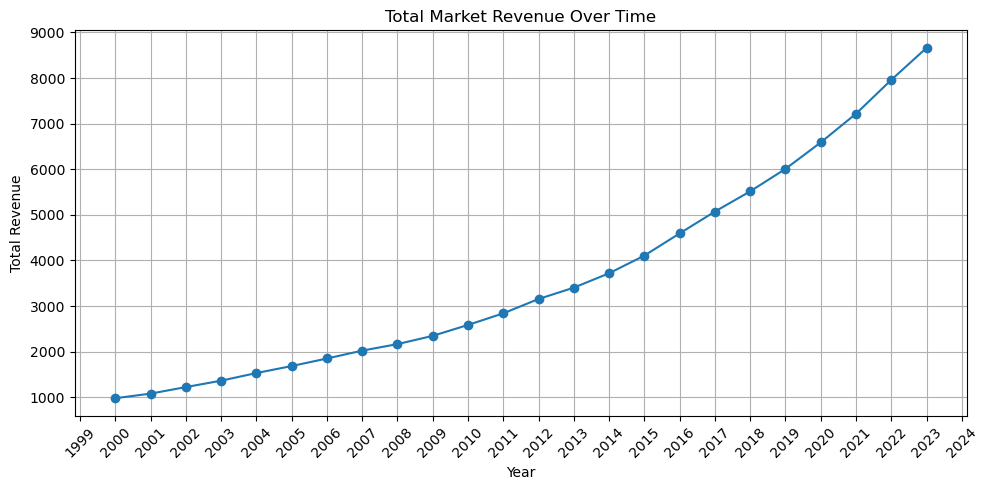

In [14]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(dataset.index, dataset['Total'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Market Revenue Over Time')
plt.grid(True)
plt.xticks(dataset.index, rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only year in the x line on plot
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()

# we are analysing what is happening in the market no in one company just.

In [15]:
# time serie analise, when the data is devided into different dates (years, months and days )
# we do predictions for a forecasting
# we dont have sazonla data

## Time Series

In [16]:
# we need to check the seasonality of the data

#ARINA and SARIMAX must work with seasonal data

# to check the seasonality of the data we need to do a hypothesis test > Ducky Fuller test

#Ho: data is not seasonal
#H1: data is seasonal 

# when we accept when we reject?
# if is greater than ALPHA we ? we accept
# if is lower than ALPHA? we reject

from statsmodels.tsa.stattools import adfuller

#we conduct the test:

result = adfuller(dataset['Total'])   # the variable that we ara analizing
print(f'p-value {result[1]}')    #we use 1 to see the p-value, and we use 0 to see the statistical standarlized value

#much greater than ALPHA, then we accept

p-value 0.9980796866704569


In [17]:
# As p value is greater than ALPHA, then we accept the null hypothesis, and then the data is not seasonal

In [18]:
#Hot Winters model: A good model that works for seasonal data

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(dataset['Total'],         # the variable that we ara analizing
                            trend = 'additive',          # we are adding more growing, exponential
                            seasonal = None,
                            seasonal_periods = None)

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [19]:
#fit/train the model

fitted_model = model.fit()

In [20]:
#now we performance the forecasting

forecast = fitted_model.forecast(3)     #3 years,therefore we can predict forecasting for the next 3 years.
forecast

2024-01-01     9364.600003
2025-01-01    10066.500006
2026-01-01    10768.400009
Freq: AS-JAN, dtype: float64

### Inferential Statistics Analysis

In [21]:
# confidential intervals
# what is the average for a market in a particular year for exmaple.
# or comparate one company

In [22]:
# what is the average income number 1 for one period

In [23]:
# we conduct a confidence intervals

# we create a new dataset with only the data from the companies
companies = dataset.loc[:, 'Company 1': 'Company 15']    # form company 1 to company 15, all those
companies.head()

,Company 1,Company 2,Company 3,Company 4,Company 5,Company 6,Company 7,Company 8,Company 9,Company 10,Company 11,Company 12,Company 13,Company 14,Company 15
Year,,,,,,,,,,,,,,,
2000-01-01,57.8,73.0,48.4,56.0,60.4,44.0,53.4,50.2,51.5,38.4,50.4,57.5,71.8,64.4,82.3
2001-01-01,64.1,83.2,51.0,60.4,69.1,50.1,58.5,55.8,55.5,41.0,55.2,62.4,79.5,68.1,94.4
2002-01-01,73.6,93.2,56.3,65.3,78.2,56.0,62.3,63.7,62.8,47.0,62.0,69.3,86.8,77.9,107.3
2003-01-01,77.6,98.1,61.2,73.8,89.8,59.7,69.2,69.3,72.0,53.3,70.3,76.0,94.8,83.9,113.3
2004-01-01,88.2,111.0,70.4,84.9,99.3,67.2,79.1,78.6,77.4,58.4,74.7,87.1,105.3,90.0,126.6


In [24]:
#descriptive stats of these companies:

companies.describe()

,Company 1,Company 2,Company 3,Company 4,Company 5,Company 6,Company 7,Company 8,Company 9,Company 10,Company 11,Company 12,Company 13,Company 14,Company 15
count,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,213.204167,278.233333,149.76250,199.145833,226.754167,175.037500,176.183333,215.029167,186.541667,138.425000,171.670833,246.045833,253.545833,206.820833,318.929167
std,134.374970,186.345158,88.75578,124.106024,139.639446,116.152133,104.497113,142.933741,120.047048,89.087428,98.360700,183.820387,168.664782,130.955691,207.699412
min,57.800000,73.000000,48.40000,56.000000,60.400000,44.000000,53.400000,50.200000,51.500000,38.400000,50.400000,57.500000,71.800000,64.400000,82.300000
25%,106.250000,131.375000,78.75000,99.375000,113.675000,80.675000,94.325000,95.225000,91.600000,71.350000,90.400000,102.200000,122.725000,101.175000,154.500000
50%,175.550000,217.000000,126.35000,164.700000,189.650000,142.850000,144.600000,173.650000,153.550000,108.800000,148.050000,182.300000,206.550000,164.050000,260.350000
75%,297.675000,391.000000,199.12500,279.025000,305.575000,237.875000,244.675000,314.400000,259.600000,183.750000,240.275000,358.125000,334.000000,288.000000,448.475000
max,529.300000,706.700000,348.40000,469.600000,523.400000,433.300000,413.700000,517.200000,459.100000,338.700000,375.900000,692.000000,644.900000,486.200000,804.300000


In [25]:
# we analyse company 1 and we want to see the real average they receive for this product in this company

sample = 24         #24 values
x_bar = 213.20      #mean
s = 134.37          #std
confidence = 0.95  #standard

In [26]:
import scipy.stats as st

company1_confidence_interval = st.t.interval(confidence = confidence, df = sample-1 , loc = x_bar, scale = s/np.sqrt(sample-1))
company1_confidence_interval

(155.24018182023167, 271.1598181797683)

### Company 1 expect a real average income for this product that is between 155 k and 271 K USD

In [27]:
# hypothesis test

# we analyse the trend in the first 5 years and the last 5 year and then we see if the trends keeps going on the same direction

In [28]:
#    H0: There are no changes in the trans over the 5 first years and last years in the Revenue
#    H1:  There are changes in the trans over the 5 first years and last years in the Revenue

In [29]:
# split the data into 2 periods(first 5 years and last):

first_period = dataset['Total'][:5]   #'column number 5'
last_period = dataset['Total'][-5:]

In [30]:
last_period

Year
2019-01-01    6008.5
2020-01-01    6588.3
2021-01-01    7218.9
2022-01-01    7960.8
2023-01-01    8662.7
Name: Total, dtype: float64

In [31]:
# we conduc the t test
from scipy import stats

t_test, p_value = stats.ttest_ind(first_period, last_period, equal_var = False)
p_value

0.00014181517066937243

As pvalue is less than alpha , we reject the null hyphotesis, and then at 5% significance level,
we can conclude that there are changes in the transds along the years